In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv('/content/data_1.csv',names=['f1','y'])
df.head()

,f1,y
0,-129.366669,28.000000
1,-130.282541,26.380447
2,-119.366669,12.000000
3,-111.659139,2.767886
4,-118.996509,-6.008839


In [12]:
df.describe()

,f1,y
count,99.000000,99.000000
mean,18.624101,-16.715312
std,84.660732,59.396962
min,-130.282541,-118.214869
25%,-63.228311,-64.352658
50%,24.203188,-34.000000
75%,105.460471,28.500000
max,132.633331,107.754816


<Axes: xlabel='f1', ylabel='y'>

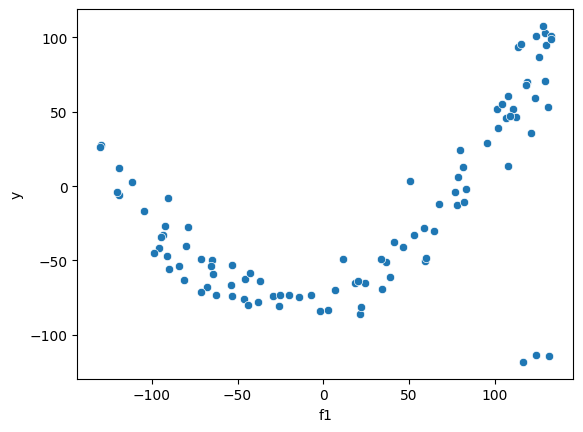

In [13]:
sns.scatterplot(data=df,x='f1',y='y')

# Model Training

In [14]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(df[['f1']],df['y'])

LinearRegression()

In [15]:
print(reg.coef_,reg.intercept_)

[0.38221563] -23.833734603860584


In [16]:
pred=reg.predict(df[['f1']])

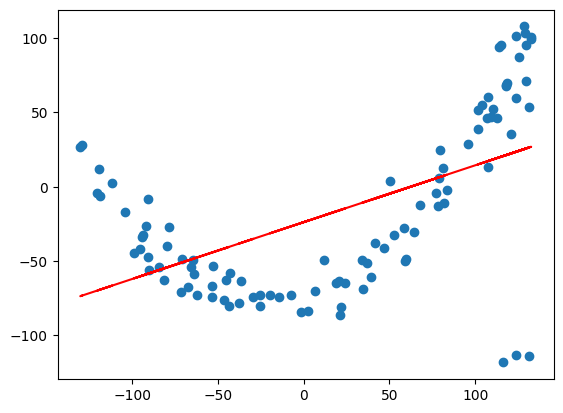

In [19]:
plt.scatter(df['f1'],df['y'])
plt.plot(df['f1'],pred,'r')
plt.show()

# Feature Engineering - Learning Polynomial Feature

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly_feature=PolynomialFeatures()
X_poly=poly_feature.fit_transform(df[['f1']])
X_poly

array([[ 1.00000000e+00, -1.29366669e+02,  1.67357350e+04],
       [ 1.00000000e+00, -1.30282541e+02,  1.69735404e+04],
       [ 1.00000000e+00, -1.19366669e+02,  1.42484016e+04],
       [ 1.00000000e+00, -1.11659139e+02,  1.24677633e+04],
       [ 1.00000000e+00, -1.18996509e+02,  1.41601691e+04],
       [ 1.00000000e+00, -1.20273299e+02,  1.44656664e+04],
       [ 1.00000000e+00, -1.04366669e+02,  1.08924015e+04],
       [ 1.00000000e+00, -9.34961665e+01,  8.74153316e+03],
       [ 1.00000000e+00, -9.05775318e+01,  8.20428927e+03],
       [ 1.00000000e+00, -9.21268759e+01,  8.48736126e+03],
       [ 1.00000000e+00, -9.43666687e+01,  8.90506816e+03],
       [ 1.00000000e+00, -7.99587739e+01,  6.39340553e+03],
       [ 1.00000000e+00, -7.87313467e+01,  6.19862495e+03],
       [ 1.00000000e+00, -9.57363624e+01,  9.16545108e+03],
       [ 1.00000000e+00, -8.43666687e+01,  7.11773479e+03],
       [ 1.00000000e+00, -6.47206705e+01,  4.18876519e+03],
       [ 1.00000000e+00, -9.10728836e+01

In [27]:
transform_df=pd.DataFrame(X_poly,columns=['f1_0','f1_1','f1_2'])
transform_df['y']=df['y']
transform_df.head()

,f1_0,f1_1,f1_2,y
0,1.0,-129.366669,16735.734971,28.000000
1,1.0,-130.282541,16973.540359,26.380447
2,1.0,-119.366669,14248.401597,12.000000
3,1.0,-111.659139,12467.763278,2.767886
4,1.0,-118.996509,14160.169083,-6.008839


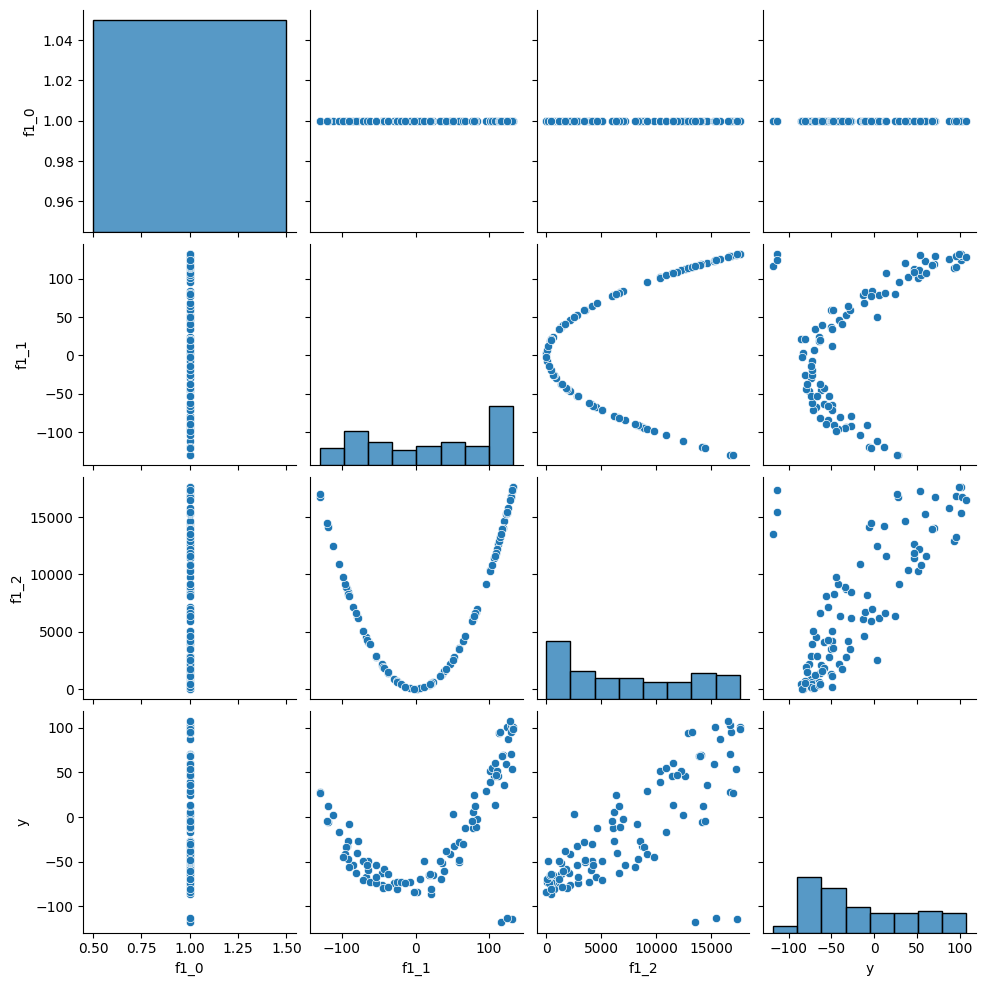

In [28]:
sns.pairplot(transform_df)

In [29]:
reg_poly=LinearRegression()

In [31]:
reg_poly.fit(transform_df[['f1_0','f1_1','f1_2']],df['y'])

LinearRegression()

In [32]:
print(reg_poly.coef_,reg_poly.intercept_)

[0.         0.22685864 0.00653552] -69.57700953233314


In [33]:
pred_poly=reg_poly.predict(transform_df[['f1_0','f1_1','f1_2']])

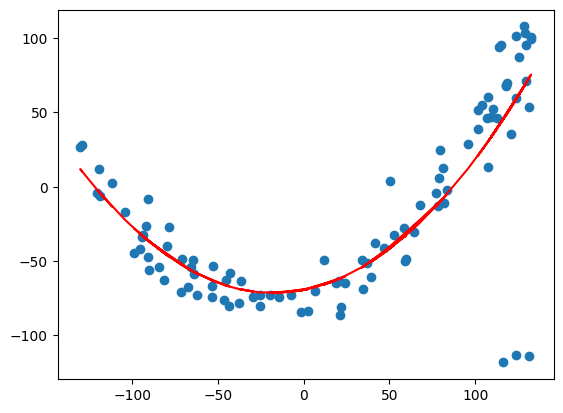

In [34]:
plt.scatter(df['f1'],df['y'])
plt.plot(df['f1'],pred_poly,'r')
plt.show()

# Other Regression Models - Lasso, Ridge, ElasticNet

# Lesso

In [36]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [38]:
reg_lasso=Lasso(alpha=1.0)
reg_lasso.fit(transform_df[['f1_0','f1_1','f1_2']],df['y'])

Lasso()

In [39]:
pred_lasso=reg_lasso.predict(transform_df[['f1_0','f1_1','f1_2']])

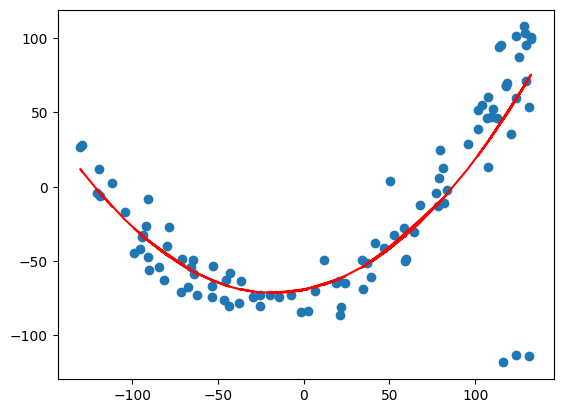

In [40]:
plt.scatter(df['f1'],df['y'])
plt.plot(df['f1'],pred_lasso,'r')
plt.show()

# Ridge

In [41]:
reg_ridge=Ridge(alpha=1.0)
reg_ridge.fit(transform_df[['f1_0','f1_1','f1_2']],df['y'])



Ridge()

In [42]:
pred_ridge=reg_ridge.predict(transform_df[['f1_0','f1_1','f1_2']])

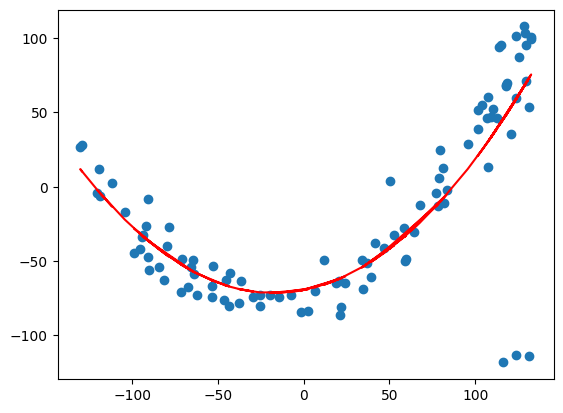

In [43]:
plt.scatter(df['f1'],df['y'])
plt.plot(df['f1'],pred_ridge,'r')
plt.show()

# ElasticNet

In [45]:
reg_elastic=ElasticNet(alpha=1.0)
reg_elastic.fit(transform_df[['f1_0','f1_1','f1_2']],df['y'])


ElasticNet()

In [47]:
pred_elastic=reg_elastic.predict(transform_df[['f1_0','f1_1','f1_2']])

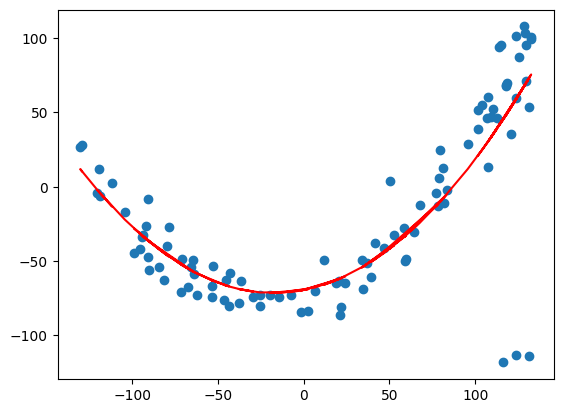

In [48]:
plt.scatter(df['f1'],df['y'])
plt.plot(df['f1'],pred_elastic,'r')
plt.show()